In [1]:
# imports and setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# read csv file, skip first 3 rows, and save them in pandas dataframe
file_name = "./open-meteo-52.50N13.40E38m(1).csv"
with open(file_name, 'r') as f:
    df = pd.read_csv(f, skiprows=3)

df.head(10)

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2003-01-01,73.0,0.6,-11.2,-6.4,-4.0,-16.8,-11.6,2003-01-01T08:17,2003-01-01T16:02,2.7,1.6,0.77,4.0,17.3,47.5,146.0,2.71,0.41
1,2003-01-02,61.0,7.2,1.5,4.7,3.6,-2.9,1.2,2003-01-02T08:17,2003-01-02T16:03,9.6,9.6,0.00,17.0,25.3,52.9,220.0,0.59,0.18
2,2003-01-03,73.0,1.7,-1.2,0.0,-2.0,-4.5,-3.4,2003-01-03T08:16,2003-01-03T16:04,4.8,2.7,1.61,12.0,13.6,34.6,19.0,1.39,0.18
3,2003-01-04,71.0,-0.9,-4.4,-2.5,-4.4,-8.9,-6.6,2003-01-04T08:16,2003-01-04T16:05,0.0,0.0,0.35,0.0,11.6,23.8,12.0,3.32,0.27
4,2003-01-05,71.0,-4.1,-6.5,-5.1,-9.0,-11.5,-10.0,2003-01-05T08:16,2003-01-05T16:06,0.5,0.0,0.56,3.0,14.0,25.6,251.0,2.10,0.49
5,2003-01-06,73.0,-3.6,-9.8,-4.9,-7.8,-14.3,-9.7,2003-01-06T08:15,2003-01-06T16:08,2.0,0.0,1.96,9.0,14.8,29.9,97.0,1.66,0.29
6,2003-01-07,3.0,-10.8,-17.1,-13.2,-15.0,-21.9,-17.5,2003-01-07T08:15,2003-01-07T16:09,0.0,0.0,0.00,0.0,8.4,18.4,19.0,2.95,0.12
7,2003-01-08,3.0,-8.6,-13.0,-10.9,-12.8,-17.6,-15.0,2003-01-08T08:14,2003-01-08T16:10,0.0,0.0,0.00,0.0,7.7,13.7,58.0,2.79,0.14
8,2003-01-09,3.0,-7.0,-14.9,-10.7,-11.1,-19.4,-14.9,2003-01-09T08:14,2003-01-09T16:12,0.0,0.0,0.00,0.0,7.9,14.4,28.0,2.29,0.15
9,2003-01-10,71.0,-2.7,-8.5,-5.3,-6.9,-12.7,-9.7,2003-01-10T08:13,2003-01-10T16:13,0.0,0.0,0.14,0.0,13.6,25.6,326.0,1.35,0.16


In [3]:
df.tail(10)

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
7598,2023-10-21,51.0,18.1,7.1,11.8,16.5,4.3,10.0,2023-10-21T06:42,2023-10-21T16:59,0.2,0.2,0.0,1.0,22.5,38.9,173.0,6.43,1.10
7599,2023-10-22,51.0,15.8,8.8,12.2,13.9,7.4,10.6,2023-10-22T06:44,2023-10-22T16:57,0.8,0.8,0.0,5.0,14.4,32.4,222.0,6.08,1.10
7600,2023-10-23,51.0,15.3,8.8,11.5,14.5,7.3,10.2,2023-10-23T06:45,2023-10-23T16:55,0.2,0.2,0.0,2.0,11.6,19.1,216.0,7.03,0.98
7601,2023-10-24,61.0,13.3,10.0,11.4,12.9,7.4,10.1,2023-10-24T06:47,2023-10-24T16:53,8.7,8.7,0.0,13.0,17.7,29.9,116.0,2.34,0.46
7602,2023-10-25,3.0,10.9,10.9,NaN,10.4,10.4,NaN,2023-10-25T06:49,2023-10-25T16:51,NaN,NaN,NaN,0.0,4.9,9.0,NaN,NaN,NaN
7603,2023-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-26T06:51,2023-10-26T16:49,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7604,2023-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-27T06:53,2023-10-27T16:47,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7605,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-28T06:54,2023-10-28T16:45,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7606,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-29T06:56,2023-10-29T16:43,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7607,2023-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-30T06:58,2023-10-30T16:41,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[:-6]

In [5]:
df.columns

Index(['time', 'weathercode (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'snowfall_sum (cm)', 'precipitation_hours (h)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [6]:
df.describe()

,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
count,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000
mean,31.525651,14.046554,6.669732,10.413089,11.597764,3.935188,7.846869,1.646593,1.540897,0.082293,3.440147,17.450987,36.424914,198.363720,10.857402,2.087497
std,27.816816,8.754291,7.127290,7.864933,10.236135,8.566113,9.364543,3.502190,3.454449,0.434715,4.838196,6.139318,12.900502,91.452753,7.690259,1.639562
min,0.000000,-13.200000,-21.600000,-18.100000,-17.800000,-26.700000,-23.300000,0.000000,0.000000,0.000000,0.000000,4.100000,9.000000,0.000000,0.210000,0.100000
25%,3.000000,7.000000,1.300000,4.300000,3.200000,-2.800000,0.400000,0.000000,0.000000,0.000000,0.000000,12.900000,27.000000,122.000000,3.572500,0.630000
50%,51.000000,14.200000,6.800000,10.500000,11.400000,3.700000,7.600000,0.100000,0.000000,0.000000,1.000000,16.600000,34.600000,221.000000,9.685000,1.680000
75%,53.000000,21.000000,12.500000,16.800000,19.700000,10.900000,15.500000,1.900000,1.600000,0.000000,6.000000,21.000000,43.200000,268.000000,17.320000,3.320000
max,75.000000,37.500000,23.800000,30.400000,38.500000,25.700000,31.600000,95.900000,95.900000,7.910000,24.000000,46.900000,112.000000,360.000000,28.970000,8.790000


In [7]:
# take temperature mean and precipitation sum as target variables, and shift them by 1 day
y = df[['time', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)']]
y = y.set_index('time')
y = y.shift(-1)
y = y.dropna()
y.head(10)

,temperature_2m_mean (°C),precipitation_sum (mm)
time,,
2003-01-01,4.7,9.6
2003-01-02,0.0,4.8
2003-01-03,-2.5,0.0
2003-01-04,-5.1,0.5
2003-01-05,-4.9,2.0
2003-01-06,-13.2,0.0
2003-01-07,-10.9,0.0
2003-01-08,-10.7,0.0
2003-01-09,-5.3,0.0


In [8]:
df = df.set_index('time')
df = df.iloc[:-1] # drop last row

In [9]:
# feature engineering
# extract year, month, day, weekday, and drop the original time column
df['time'] = pd.to_datetime(df.index)
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['weekday'] = df['time'].dt.weekday
df = df.drop(columns=['time'])

In [10]:
# extract minute in day from sunrise and sunset columns: 'sunrise (iso8601)', 'sunset (iso8601)'
df['sunrise'] = pd.to_datetime(df['sunrise (iso8601)'])
df['sunrise'] = df['sunrise'].dt.hour * 60 + df['sunrise'].dt.minute
df['sunset'] = pd.to_datetime(df['sunset (iso8601)'])
df['sunset'] = df['sunset'].dt.hour * 60 + df['sunset'].dt.minute
df = df.drop(columns=['sunrise (iso8601)', 'sunset (iso8601)'])

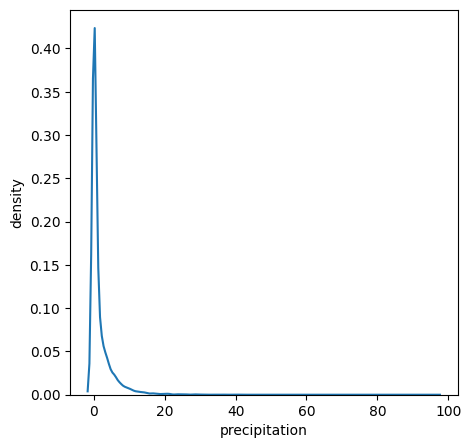

In [11]:
# plot precipitation kde 
plt.figure(figsize=(5, 5))
sns.kdeplot(df['precipitation_sum (mm)'])
plt.xlabel('precipitation')
plt.ylabel('density')
plt.show()


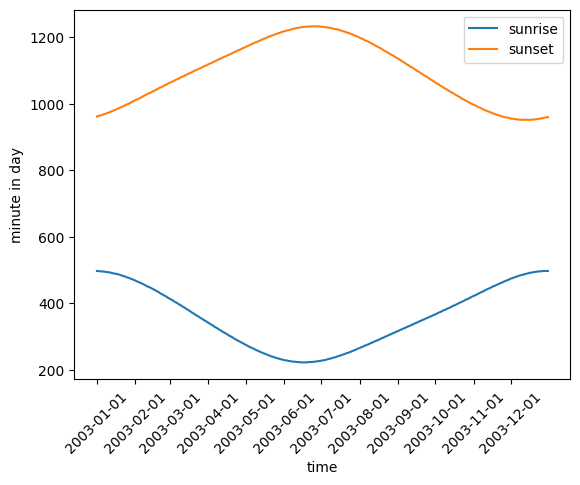

In [12]:
# plot sunrise and sunset for year 2003
plt.plot(df[df['year'] == 2003]['sunrise'])
plt.plot(df[df['year'] == 2003]['sunset'])
plt.legend(['sunrise', 'sunset'])
# do not show all time stamps on x-axis, but only month numbers at the beginning of each month
plt.xticks(df[df['year'] == 2003].index[df[df['year'] == 2003]['day'] == 1], rotation=45)
plt.xlabel('time')
plt.ylabel('minute in day')
plt.show()

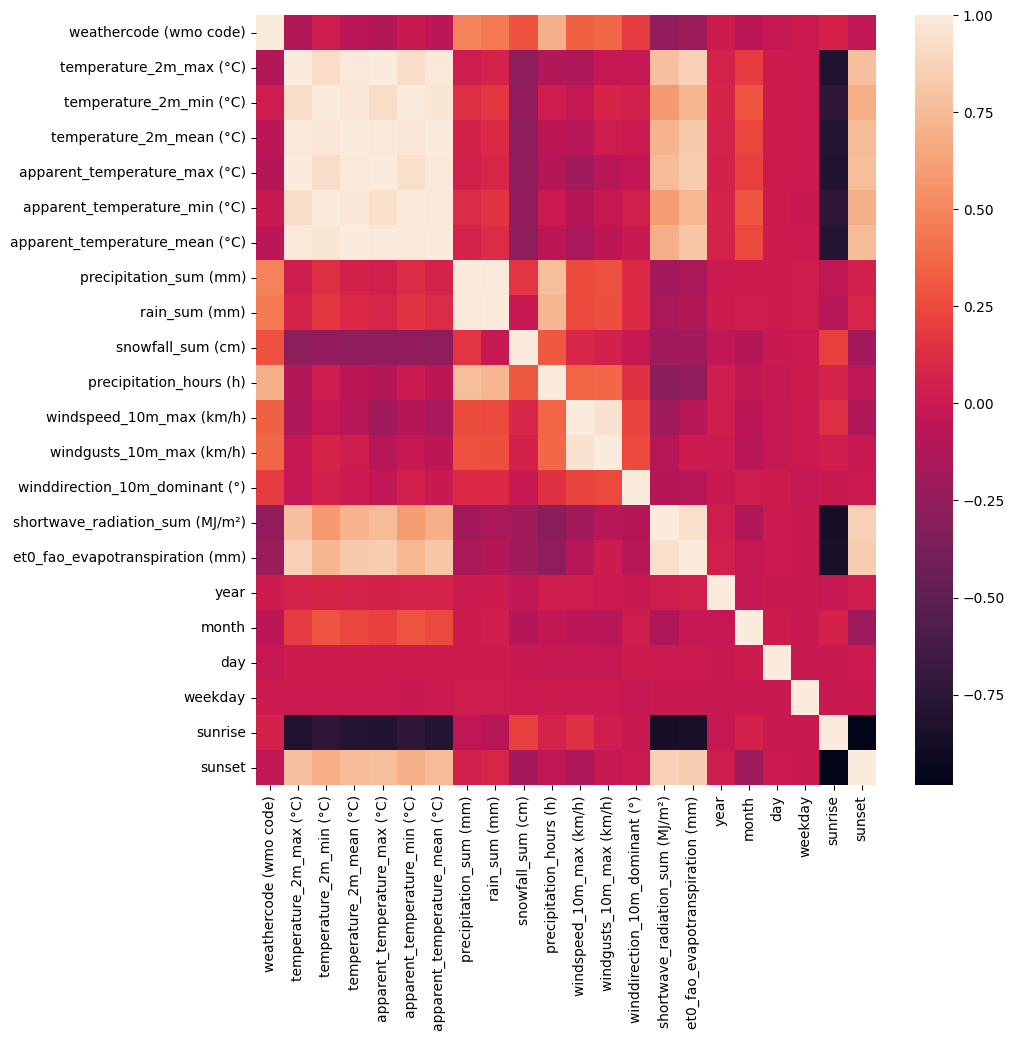

In [13]:
# plot correlation matrix, without numbers
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False)
plt.show()

### Naive predictions

rolling average

In [14]:
# predict rolling average temperature and precipitation for the next day
# use the last 10 days as input
def create_rolling_average(df, column, window_size):
    df[column + '_rolling'] = df[column].rolling(window=window_size).mean()
    return df

df_tmp = create_rolling_average(df.copy(), 'temperature_2m_mean (°C)', 10)
df_pre = create_rolling_average(df.copy(), 'precipitation_sum (mm)', 10)


In [15]:
# calculate RMSE for rolling average temperature and precipitation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# drop first 10 rows, because they contain NaN values
df_tmp1 = df_tmp.iloc[10:]
df_pre1 = df_pre.iloc[10:]

print('RMSE rolling average temperature: ', rmse(df_tmp1['temperature_2m_mean (°C)'], df_tmp1['temperature_2m_mean (°C)_rolling']))
print('RMSE rolling average precipitation: ', rmse(df_pre1['precipitation_sum (mm)'], df_pre1['precipitation_sum (mm)_rolling']))


RMSE rolling average temperature:  2.835860529021235
RMSE rolling average precipitation:  3.262072770349671


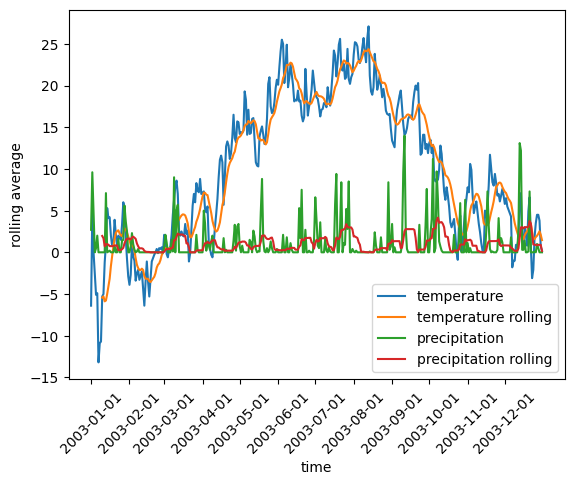

In [16]:

# plot rolling average temperature and precipitation for year 2003
plt.plot(df_tmp[df_tmp['year'] == 2003]['temperature_2m_mean (°C)'])
plt.plot(df_tmp[df_tmp['year'] == 2003]['temperature_2m_mean (°C)_rolling'])
plt.plot(df_pre[df_pre['year'] == 2003]['precipitation_sum (mm)'])
plt.plot(df_pre[df_pre['year'] == 2003]['precipitation_sum (mm)_rolling'])
plt.legend(['temperature', 'temperature rolling', 'precipitation', 'precipitation rolling'])
plt.xticks(df[df['year'] == 2003].index[df[df['year'] == 2003]['day'] == 1], rotation=45)
plt.xlabel('time')
plt.ylabel('rolling average')
plt.show()


linear regression

In [17]:
# linear regression

# split data into train and test set
X = df.copy() #.drop(columns=['temperature_2m_mean (°C)', 'precipitation_sum (mm)'])
y = df[['temperature_2m_mean (°C)', 'precipitation_sum (mm)']]
y = y.shift(-1)
y = y.dropna()
X = X.iloc[:-1] # drop last row
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# calculate RMSE
print('RMSE temperature: ', rmse(y_test['temperature_2m_mean (°C)'], y_pred[:, 0]))
print('RMSE precipitation: ', rmse(y_test['precipitation_sum (mm)'], y_pred[:, 1]))


RMSE temperature:  1.9317124550031086
RMSE precipitation:  3.249760699834582


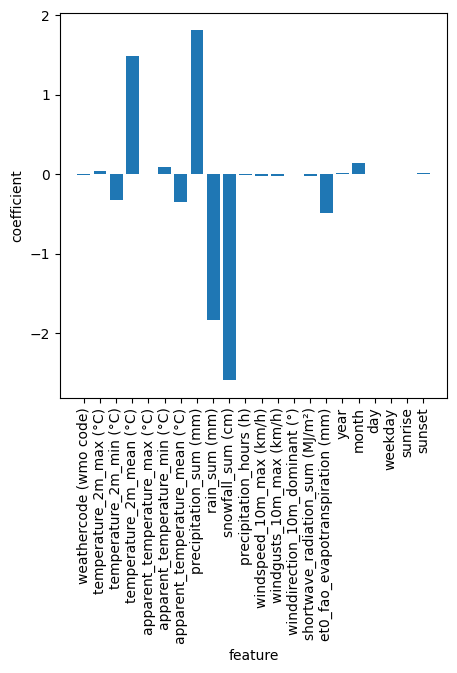

In [18]:
c = model.coef_ 
# plot coefficients for target variable: temperature mean
plt.figure(figsize=(5, 5))
plt.bar(X.columns, c[0])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.show()

In [19]:
# 2 seperate plots for predicted and true temperature and precipitation (y_test vs y_pred)
# reset index of y_test and y_pred, so that they have the same index
y_test = y_test.reset_index(drop=True)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = y_test.columns
y_pred = y_pred.reset_index(drop=True)


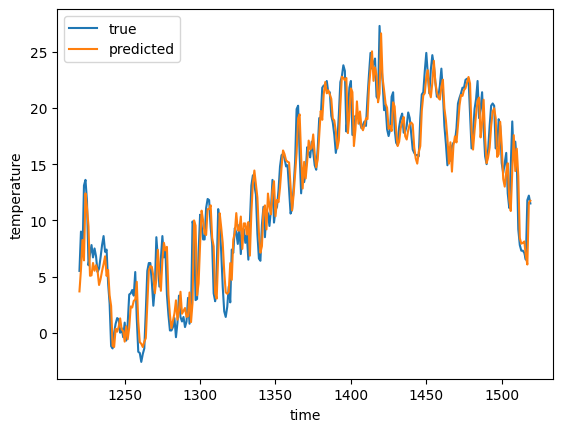

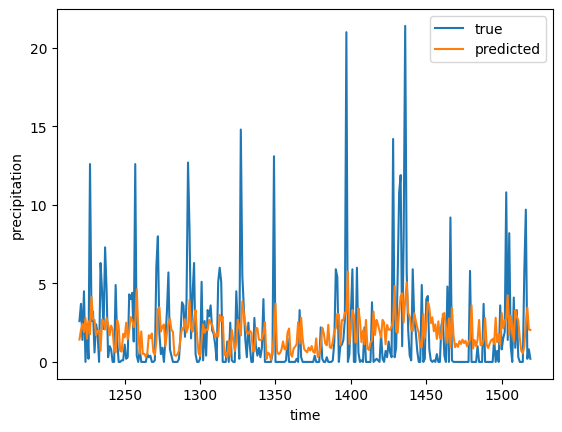

In [20]:

# plot temperature
plt.plot(y_test['temperature_2m_mean (°C)'][-300:])
plt.plot(y_pred['temperature_2m_mean (°C)'][-300:])
plt.legend(['true', 'predicted'])
plt.xlabel('time')
plt.ylabel('temperature')
plt.show()

# plot precipitation
plt.plot(y_test['precipitation_sum (mm)'][-300:])
plt.plot(y_pred['precipitation_sum (mm)'][-300:])
plt.legend(['true', 'predicted'])
plt.xlabel('time')
plt.ylabel('precipitation')
plt.show()




polynomial regression

In [21]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# train polynomial regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# calculate RMSE
print('RMSE temperature: ', rmse(y_test['temperature_2m_mean (°C)'], y_pred[:, 0]))
print('RMSE precipitation: ', rmse(y_test['precipitation_sum (mm)'], y_pred[:, 1]))

RMSE temperature:  1.8688351714041616
RMSE precipitation:  3.3999376212621613


### Tensorflow NeuralNet prediction

autoregressive model

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler


2023-11-01 23:02:54.159433: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 23:02:54.196500: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 23:02:54.197649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 23:02:54.937014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:

def normalize_data(values):
    # Assuming values is a DataFrame
    scaler = MinMaxScaler()  # MinMaxScaler returns values as a numpy array
    values_scaled = scaler.fit_transform(values)
    return pd.DataFrame(values_scaled, index=values.index, columns=values.columns), scaler

X_train_norm, X_scaler = normalize_data(X_train)
y_train_norm, y_scaler = normalize_data(y_train)
X_test_norm, _ = normalize_data(X_test)  # re-use scalers to ensure consistent normalization
y_test_norm, _ = normalize_data(y_test)


In [24]:

np.random.seed(0)
tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=y_train.shape[1])])  # specify the number of output units

optimizer = tf.keras.optimizers.SGD(0.01)

model.compile(
    loss='mean_squared_error',
    optimizer=optimizer
)

# Since you didn't provide a validation set, we'll omit the validation_data argument
history = model.fit(
    X_train_norm,
    y_train_norm,
    epochs=10
)


Epoch 1/10


2023-11-01 23:02:55.584127: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 23:02:55.584767: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


190/190 [==============================] - 0s 650us/step - loss: 0.1081
Epoch 2/10
190/190 [==============================] - 0s 643us/step - loss: 0.0532
Epoch 3/10
190/190 [==============================] - 0s 635us/step - loss: 0.0375
Epoch 4/10
190/190 [==============================] - 0s 663us/step - loss: 0.0275
Epoch 5/10
190/190 [==============================] - 0s 638us/step - loss: 0.0208
Epoch 6/10
190/190 [==============================] - 0s 619us/step - loss: 0.0163
Epoch 7/10
190/190 [==============================] - 0s 649us/step - loss: 0.0131
Epoch 8/10
190/190 [==============================] - 0s 626us/step - loss: 0.0109
Epoch 9/10
190/190 [==============================] - 0s 625us/step - loss: 0.0092
Epoch 10/10
190/190 [==============================] - 0s 624us/step - loss: 0.0080


48/48 [==============================] - 0s 575us/step


<Figure size 640x480 with 0 Axes>

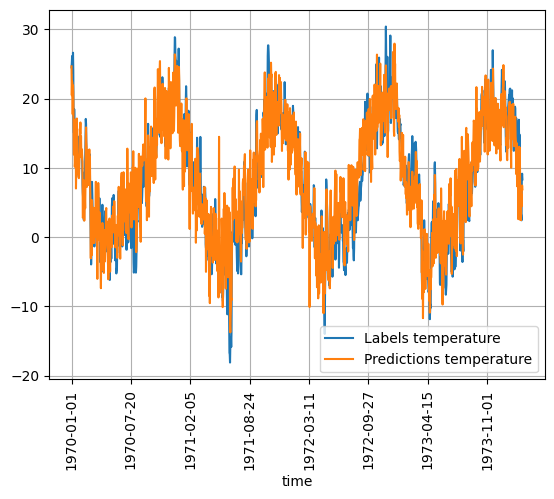

In [25]:

def visualize_predictions(data):
    plt.figure()
    ax = data.plot(x_compat=True, grid=True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90)
    plt.show()

test_predict = model.predict(X_test_norm)

# Transform predictions and labels back to original scale for visualization and error calculation
test_predict_orig = y_scaler.inverse_transform(test_predict)
y_test_orig = y_scaler.inverse_transform(y_test_norm)

plot_df = pd.DataFrame(index=X_test.index, data = {
    'Labels temperature': y_test_orig[:, 0],
    'Predictions temperature': test_predict_orig[:, 0],
    # 'Labels precipitation': y_test_orig[:, 1],
    # 'Predictions precipitation': test_predict_orig[:, 1]
})

_ = visualize_predictions(plot_df)


In [26]:

mse = mean_squared_error(test_predict_orig, y_test_orig)
print(f"Autoregressive model's MSE score: {mse:.4}")

mse_temp = mean_squared_error(y_test_orig[:, 0], test_predict_orig[:, 0])
rmse_temp = np.sqrt(mse_temp)
print(f"RMSE for temperature: {rmse_temp:.4f}")

mse_precip = mean_squared_error(y_test_orig[:, 1], test_predict_orig[:, 1])
rmse_precip = np.sqrt(mse_precip)
print(f"RMSE for precipitation: {rmse_precip:.4f}")


Autoregressive model's MSE score: 118.1
RMSE for temperature: 4.0985
RMSE for precipitation: 14.8136


complex neural net

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [28]:

y_temp = df.pop('temperature_2m_mean (°C)')
y_precip = df.pop('precipitation_sum (mm)')

y_labels = [y_temp, y_precip]

# Assuming all remaining features in df are important
important_features = df.columns

X_train, X_test, y_train, y_test = train_test_split(
    df[important_features], pd.concat(y_labels, axis=1), test_size=0.3, shuffle=False)

# Normalize the data (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:

input = keras.Input(shape=(X_train.shape[1],))

# Shared layer(s)
x = layers.Dense(128, activation='relu')(input)
x = layers.Dropout(0.1)(x)

# Task-specific layers for temperature prediction
x_temp = layers.Dense(64, activation='relu')(x)
x_temp = layers.Dropout(0.1)(x_temp)
output_temp = layers.Dense(1, name='temperature')(x_temp)

# Task-specific layers for precipitation prediction
x_precip = layers.Dense(64, activation='relu')(x)
x_precip = layers.Dropout(0.1)(x_precip)
output_precip = layers.Dense(1, name='precipitation')(x_precip)

model = keras.Model(inputs=input, outputs=[output_temp, output_precip])

model.compile(
    loss='mean_squared_error',  # Adjusted loss function to MSE for regression tasks
    optimizer=tf.keras.optimizers.Adam(0.001)
)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 20)]                 0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 128)                  2688      ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128)                  0         ['dense_1[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 64)                   8256      ['dropout[0][0]']             
                                                                                              

In [30]:

history = model.fit(
    X_train,
    {'temperature': y_train['temperature_2m_mean (°C)'], 'precipitation': y_train['precipitation_sum (mm)']},
    validation_split=0.2,
    epochs=10  # Adjust the number of epochs based on the training process
)


Epoch 1/10


133/133 [==============================] - 1s 2ms/step - loss: 36.8141 - temperature_loss: 32.6031 - precipitation_loss: 4.2110 - val_loss: 4.4979 - val_temperature_loss: 2.9874 - val_precipitation_loss: 1.5104
Epoch 2/10
133/133 [==============================] - 0s 1ms/step - loss: 3.7766 - temperature_loss: 3.1119 - precipitation_loss: 0.6647 - val_loss: 2.1629 - val_temperature_loss: 1.7461 - val_precipitation_loss: 0.4167
Epoch 3/10
133/133 [==============================] - 0s 1ms/step - loss: 2.7396 - temperature_loss: 2.3622 - precipitation_loss: 0.3774 - val_loss: 1.3048 - val_temperature_loss: 1.0488 - val_precipitation_loss: 0.2561
Epoch 4/10
133/133 [==============================] - 0s 1ms/step - loss: 2.2928 - temperature_loss: 1.9623 - precipitation_loss: 0.3305 - val_loss: 1.0508 - val_temperature_loss: 0.9090 - val_precipitation_loss: 0.1419
Epoch 5/10
133/133 [==============================] - 0s 1ms/step - loss: 1.9943 - temperature_loss: 1.6811 - precipitation_loss:

In [31]:

# Evaluate model
y_pred = model.predict(X_test)
y_pred_temp, y_pred_precip = y_pred[0], y_pred[1]

# Calculate RMSE
rmse_temp = np.sqrt(mean_squared_error(y_test['temperature_2m_mean (°C)'], y_pred_temp))
rmse_precip = np.sqrt(mean_squared_error(y_test['precipitation_sum (mm)'], y_pred_precip))

print(f'RMSE for temperature: {rmse_temp:.4f}')
print(f'RMSE for precipitation: {rmse_precip:.4f}')


72/72 [==============================] - 0s 3ms/step
RMSE for temperature: 0.8905
RMSE for precipitation: 0.2420


<Figure size 640x480 with 0 Axes>

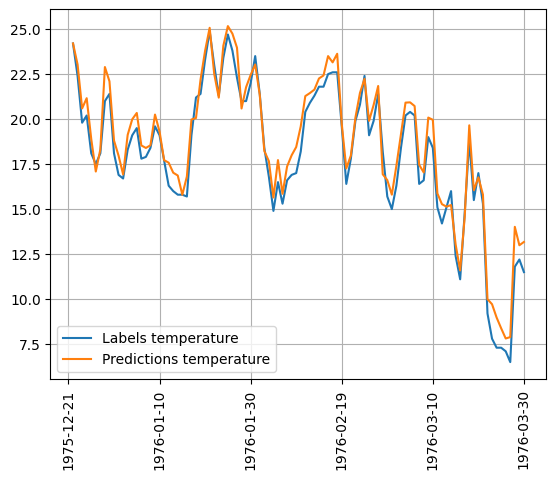

In [33]:
# Plot predictions
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def visualize_predictions(data):
    plt.figure()
    ax = data.plot(x_compat=True, grid=True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90)
    plt.show()

plot_n = 100

plot_df = pd.DataFrame(index=pd.DataFrame(X_test).index[-plot_n:], data = {
    'Labels temperature': y_test['temperature_2m_mean (°C)'].values[-plot_n:],
    'Predictions temperature': y_pred_temp[-plot_n:].flatten(),
    # 'Labels precipitation': y_test['precipitation_sum (mm)'].values[-plot_n:],
    # 'Predictions precipitation': y_pred_precip[-plot_n:]
})

_ = visualize_predictions(plot_df)

In [34]:
# save model
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
model.save('dnn_multitarget_'+ timestamp +'.h5')

/home/drew99/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
